In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
% matplotlib inline
from six.moves import cPickle
from sklearn.preprocessing import LabelEncoder
from six.moves import cPickle

In [2]:
cust = pd.read_csv('./Data/challenge_Data/BGCON_CUST_DATA.csv',
                          encoding = 'utf-16')

In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 25 columns):
CUST_ID             22400 non-null int64
DIVIDED_SET         22400 non-null int64
SIU_CUST_YN         20607 non-null object
SEX                 22400 non-null int64
AGE                 22400 non-null int64
RESI_COST           22400 non-null int64
RESI_TYPE_CODE      21146 non-null float64
FP_CAREER           22400 non-null object
CUST_RGST           21944 non-null float64
CTPR                21779 non-null object
OCCP_GRP_1          21805 non-null object
OCCP_GRP_2          21805 non-null object
TOTALPREM           16609 non-null float64
MINCRDT             12924 non-null float64
MAXCRDT             12924 non-null float64
WEDD_YN             21927 non-null object
MATE_OCCP_GRP_1     10573 non-null object
MATE_OCCP_GRP_2     10573 non-null object
CHLD_CNT            21927 non-null float64
LTBN_CHLD_AGE       21927 non-null float64
MAX_PAYM_YM         15914 non-null float64
MAX_PR

In [11]:
cust.MAX_PRM.dropna().std()

1327264.7460239918

In [3]:
cust.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CUST_ID,DIVIDED_SET,SEX,AGE,RESI_COST,RESI_TYPE_CODE,CUST_RGST,TOTALPREM,MINCRDT,MAXCRDT,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,21146.000000,21944.000000,1.660900e+04,12924.000000,12924.000000,21927.000000,21927.000000,15914.000000,1.591400e+04,17137.000000,22400.000000,21720.000000
mean,11200.500000,1.080045,1.565134,44.734866,15914.413973,25.765251,198924.250638,2.998266e+07,5.838904,19.480656,0.709491,8.603731,200881.825437,4.807763e+05,2704.184863,4768.733884,5198.238950
std,6466.467351,0.271368,0.495750,15.445707,14963.317519,20.691869,16989.329112,4.897438e+07,3.515198,32.363151,0.953671,11.585592,522.266749,1.327265e+06,2188.208641,3072.385280,2714.947843
min,1.000000,1.000000,1.000000,2.000000,0.000000,11.000000,101.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,199801.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,5600.750000,1.000000,1.000000,34.000000,6732.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2995.000000,NaN
50%,11200.500000,1.000000,2.000000,46.000000,12222.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4807.000000,NaN
75%,16800.250000,1.000000,2.000000,56.000000,20988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6607.250000,NaN
max,22400.000000,2.000000,2.000000,89.000000,305555.000000,99.000000,201602.000000,1.840052e+09,99.000000,99.000000,6.000000,35.000000,207110.000000,5.686262e+07,12687.000000,19829.000000,25872.000000


# Step1

In [3]:
description = pd.read_excel('./Data/challenge_Data/description.xlsx', sheetname='BGCON_CUST_DATA')
categorical = list(description.loc[description['변수타입'] == 'C', '변수영문명'])
numerical = list(description.loc[description['변수타입'] == 'N', '변수영문명'])

In [4]:
features = list(cust.columns)
target = []
for feature in features:
    if cust[feature].isnull().sum() != 0:
        target.append(feature)

In [5]:
n_target = set(target).intersection(set(numerical))
c_target = set(target).intersection(set(categorical))
n_target = list(n_target)
c_target = list(c_target)

In [6]:
# 'RESI_COST' missing value = 0
if 'RESI_COST'not in n_target:
    n_target.append('RESI_COST')

In [7]:
# 'MINICRDT' and 'MAXCRDT' missing value = 6
if 'MINICRDT' not in c_target:
    c_target.append('MINCRDT')
if 'MAXCRDT' not in c_target:
    c_target.append('MAXCRDT')
    
# 'SIU_CUST_YN' is label
c_target.remove('SIU_CUST_YN')

# Step2
## Numerical Type

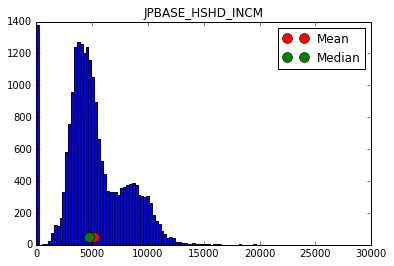

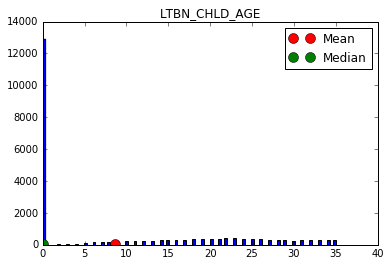

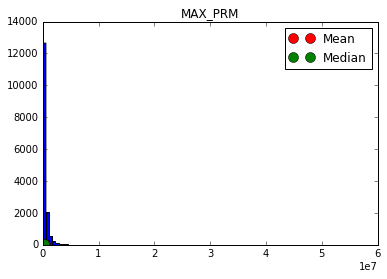

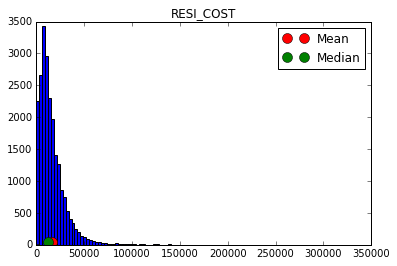

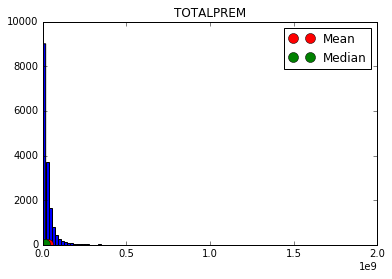

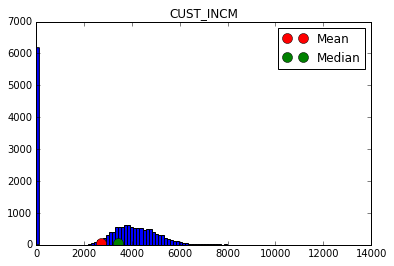

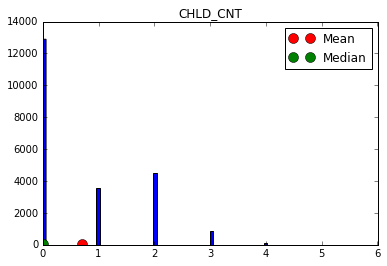

In [8]:
# Decide whether fill missing values with median or mean
n_dic = {}
for nt in n_target:
    values = cust.loc[~cust[nt].isnull(), nt].values
    n_dic[nt] = values

for key in list(n_dic.keys()):
    plt.hist(n_dic[key], bins=100)
    plt.plot(np.mean(n_dic[key]), 50, 'ro', markersize=10, label='Mean')
    plt.plot(np.median(n_dic[key]), 50, 'go', markersize=10, label='Median')
    plt.legend(loc=1)
    plt.title(key)
    plt.show()

In [9]:
# Warning1 : 'RESI_COST' missing values = 0
# Warning2 : 'CUST_INCM' is filled by median
for nt in n_target:    
    if nt == 'RESI_COST':
        filling = np.mean(cust.loc[cust[nt] != 0, nt].values)
        cust.loc[cust[nt] == 0, nt] = filling
    elif nt == 'CUST_INCM':
        filling = 0
        cust.loc[cust[nt].isnull(), nt] = filling
    elif nt == 'CHLD_CNT':
        filling = np.median(cust.loc[~cust[nt].isnull(), nt].values)
        cust.loc[cust[nt].isnull(), nt] = filling
    else:
        filling = np.mean(cust.loc[~cust[nt].isnull(), nt].values)
        cust.loc[cust[nt].isnull(), nt] = filling

## Categorize

In [10]:
def cate_go(df, colname):
    
    cut = np.linspace(df[colname].min(),df[colname].max(),10)

    cate = np.arange(1,10)
    df.loc[df[colname] == cut[0], colname] = 0
    
    for i in range(0,9):
        df.loc[ (df[colname] > cut[i]) & (df[colname] <= cut[i+1]), colname] = cate[i]
    return df

def plot_col(df, colname):
    plt.hist(df[colname], bins=100)
    plt.plot(np.mean(df[colname]), 50, 'ro', markersize=10, label='Mean')
    plt.plot(np.median(df[colname]), 50, 'go', markersize=10, label='Median')
    plt.legend(loc=1)
    plt.title(key)
    plt.show()

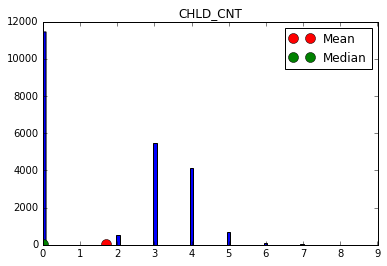

In [11]:
cust = cate_go(cust, 'CUST_INCM')
plot_col(cust, 'CUST_INCM')

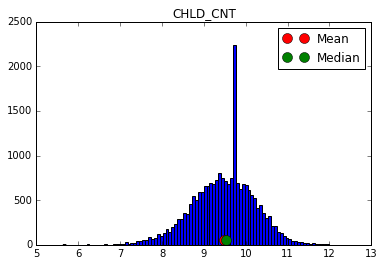

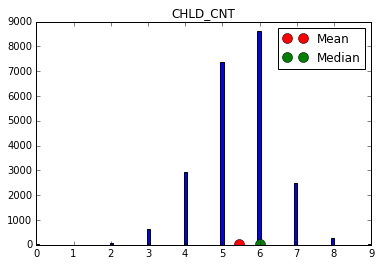

In [12]:
cust['RESI_COST_LOG'] = np.log(cust.RESI_COST.values)
plot_col(cust, 'RESI_COST_LOG')
cust = cate_go(cust, 'RESI_COST_LOG')
plot_col(cust, 'RESI_COST_LOG')

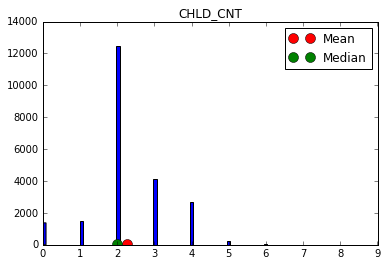

In [13]:
cust = cate_go(cust, 'JPBASE_HSHD_INCM')
plot_col(cust, 'JPBASE_HSHD_INCM')

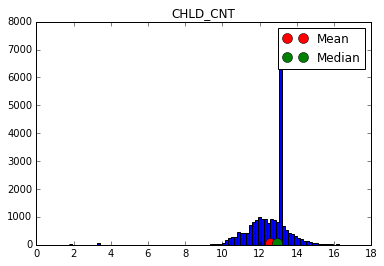

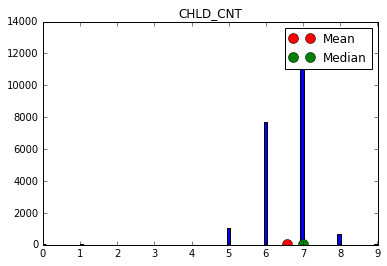

In [14]:
cust['MAX_PRM_LOG'] = np.log(cust.MAX_PRM.values)
plot_col(cust, 'MAX_PRM_LOG')

cust = cate_go(cust, 'MAX_PRM_LOG')
plot_col(cust, 'MAX_PRM_LOG')

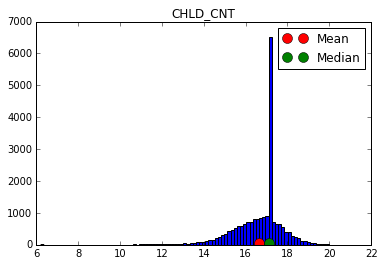

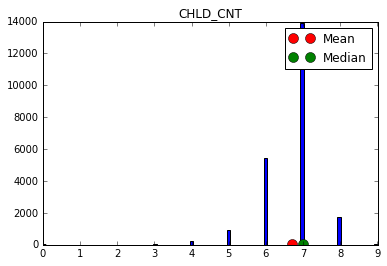

In [15]:
cust['TOTALPREM_LOG'] = np.log(cust.TOTALPREM.values)
plot_col(cust, 'TOTALPREM_LOG')

cust = cate_go(cust, 'TOTALPREM_LOG')
plot_col(cust, 'TOTALPREM_LOG')

# Step3
## Categorical Type
### Targeting NaN

In [16]:
# Missing values are replaced by '-9999' or -9999
string_type = ['WEDD_YN', 'CTPR', 'OCCP_GRP_1', 'OCCP_GRP_2',
                 'MATE_OCCP_GRP_2', 'MATE_OCCP_GRP_1']
non_string_type = list(set(c_target) - set(string_type))

for st in string_type:
    cust.loc[cust[st].isnull(), st] = '-9999'
for nst in non_string_type:
    cust.loc[cust[nst].isnull(), nst] = np.float(-9999)

# 'MINCRT' and 'MAXCRT' need one more replacement
cust.loc[cust['MINCRDT'] == 6, 'MINCRDT'] = np.float(-9999)
cust.loc[cust['MAXCRDT'] == 6, 'MAXCRDT'] = np.float(-9999)

In [17]:
for st in string_type:

    X = cust.loc[cust[st] != '-999', st].values
    lbl_enc = LabelEncoder()
    lbl_enc.fit(X)
    
    for element in lbl_enc.classes_:
        cust.loc[cust[st] == element, st] = lbl_enc.transform(element)
    
    cust.loc[cust[st] == '-999', st] = -999

In [18]:
non_string_type.remove('MAX_PAYM_YM')
for nst in non_string_type:
    
    X = cust.loc[cust[nst] != -999, nst].values
    lbl_enc = LabelEncoder()
    lbl_enc.fit(X)
    
    for element in lbl_enc.classes_:
        cust.loc[cust[nst] == element, nst] = lbl_enc.transform(element)

## split year month 

- I think month is not important. it will be removed

In [19]:
def year_convert(input):
    if input < 0:
        return -9999
    else:
        string_type = str(input)
        string_year = string_type[0:4]
        return np.float64(string_year)

def month_convert(input):
    if input < 0 :
        return -9999
    else:
        string_type = str(input)
        string_month = string_type[5:]
        return np.float64(string_month)

cust['MAX_PAYM_Y'] = cust['MAX_PAYM_YM'].apply(year_convert)
cust['MAX_PAYM_M'] = cust['MAX_PAYM_YM'].apply(month_convert)

cust['MAX_PAYM_Y'] = cust['MAX_PAYM_Y'].astype(np.int64)
cust['MAX_PAYM_M'] = cust['MAX_PAYM_M'].astype(np.int64)

cust.drop('MAX_PAYM_YM', axis = 1, inplace = True)

### Targeting no-NaN

In [20]:
no_NaN = list(set(categorical) - set(c_target))
no_NaN.remove('SIU_CUST_YN')
print(no_NaN)

['FP_CAREER']


- All features are string type - need labeling

In [21]:
for feature in no_NaN:
    
    X = cust[feature].values
    lbl_enc = LabelEncoder()
    lbl_enc.fit(X)
    
    for element in lbl_enc.classes_ :
        cust.loc[cust[feature] == element, feature] = np.float(lbl_enc.transform(element))

# Step5

In [22]:
cust.columns

Index(['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST',
       'RESI_TYPE_CODE', 'FP_CAREER', 'CUST_RGST', 'CTPR', 'OCCP_GRP_1',
       'OCCP_GRP_2', 'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN',
       'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2', 'CHLD_CNT', 'LTBN_CHLD_AGE',
       'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM',
       'RESI_COST_LOG', 'MAX_PRM_LOG', 'TOTALPREM_LOG', 'MAX_PAYM_Y',
       'MAX_PAYM_M'],
      dtype='object')

In [23]:
cust.loc[cust['SIU_CUST_YN'] == 'Y', 'SIU_CUST_YN'] = np.int64(1)
cust.loc[cust['SIU_CUST_YN'] == 'N', 'SIU_CUST_YN'] = np.int64(0)

In [24]:
categorical.remove('MAX_PAYM_YM')
categorical.append('MAX_PAYM_Y')
categorical.append('MAX_PAYM_M')
features.remove('MAX_PAYM_YM')
features.append('MAX_PAYM_Y')
features.append('MAX_PAYM_M')

In [25]:
for c in categorical:
    if c == 'SIU_CUST_YN':
        continue
    cust[c] = cust[c].astype(np.int64)
for n in numerical:
    cust[n] = cust[n].astype(np.float64)

In [26]:
train_set = cust.loc[~cust['SIU_CUST_YN'].isnull(), features]
test_set = cust.loc[cust['SIU_CUST_YN'].isnull(), features]
label_id = cust[['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN']]

train_set['SIU_CUST_YN'] = train_set['SIU_CUST_YN'].astype(np.int64)

# Step6

In [27]:
cPickle.dump(cust, open('./Dump/cust.pkl', 'wb'), -1)
cPickle.dump(train_set, open('./Dump/cust_train.pkl', 'wb'), -1)
cPickle.dump(test_set, open('./Dump/cust_test.pkl', 'wb'), -1)
cPickle.dump(label_id, open('./Dump/label_id.pkl', 'wb'), -1)